In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

In [2]:
# Read the Mouse and Drug Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
mouse_drug_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [3]:
# Read the Clinical Trial Data
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)
clinical_trial_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
combined_data = pd.merge(clinical_trial_data, mouse_drug_data, how='outer', on='Mouse ID')

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [5]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_mean = combined_data.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].agg('mean')

# Convert to DataFrame
tumor_mean = tumor_mean.to_frame()
tumor_mean = tumor_mean.reset_index()

# Preview DataFrame
tumor_mean.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [6]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_stderr = combined_data.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].agg('sem')

# Convert to DataFrame
tumor_stderr = tumor_stderr.to_frame()
tumor_stderr = tumor_stderr.reset_index()

# Preview DataFrame
tumor_stderr.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [7]:
# Minor Data Munging to Re-Format the Data Frames
tumor_mean = tumor_mean.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
#tumor_response_mean = tumor_response_mean.reset_index()

# Alternatively, grouping, calculating mean, and reformatting can be performed with the following: 
# tumor_response_mean = combined_data.groupby(['Timepoint','Drug'])['Tumor Volume (mm3)'].agg('mean').unstack()

# Preview that Reformatting worked
tumor_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [8]:
# Minor Data Munging to Re-Format the Data Frames
tumor_stderr = tumor_stderr.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Alternatively, grouping, calculating standard error, and reformatting can be performed with the following: 
# tumor_response_stderr = combined_data.groupby(['Timepoint','Drug'])['Tumor Volume (mm3)'].agg('sem').unstack()

# Preview that Reformatting worked
tumor_stderr.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


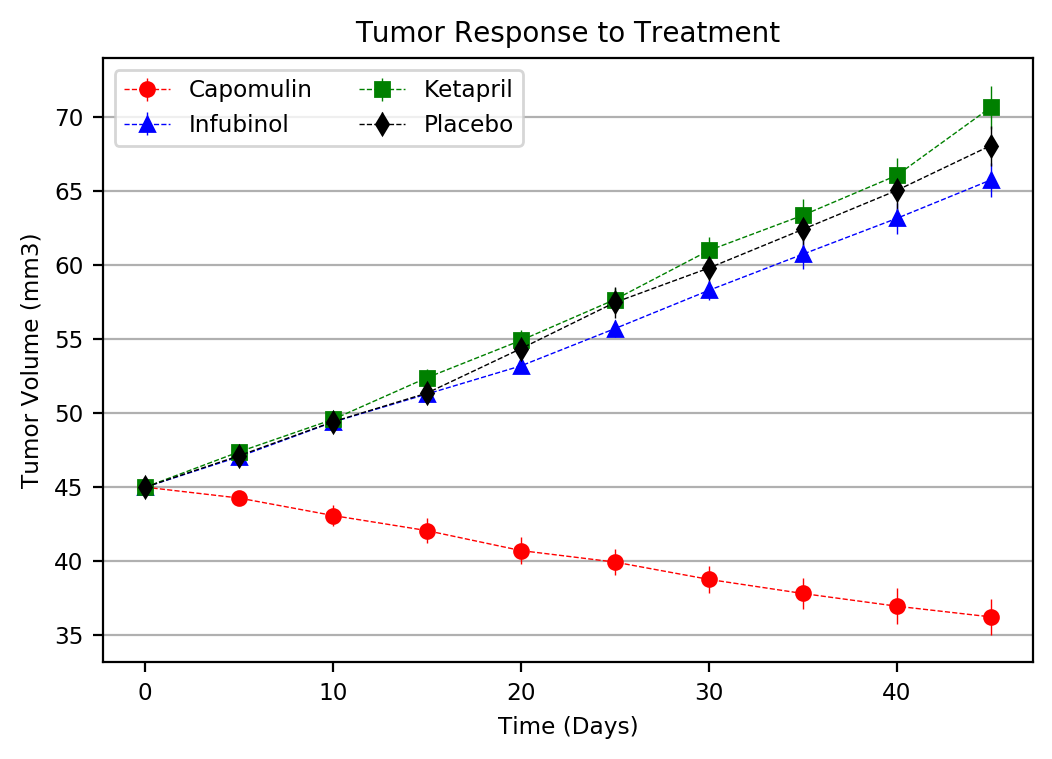

In [9]:
# Generate the Plot (with Error Bars)
plt.rcParams['figure.dpi'] = 200
fig, tumor_res = plt.subplots()

tumor_res.errorbar(tumor_mean.index, tumor_mean['Capomulin'], tumor_stderr['Capomulin'], label='Capomulin',
                   fmt='o', ms=5, c='r', ls='--', linewidth=0.5)
#tumor_res.errorbar(tumor_mean.index, tumor_mean['Ceftamin'], tumor_stderr['Ceftamin'], label='Ceftamin',
#                   fmt='p', ms=5, c='m',  ls='--', linewidth=0.5)
tumor_res.errorbar(tumor_mean.index, tumor_mean['Infubinol'], tumor_stderr['Infubinol'], label='Infubinol',
                   fmt='^', ms=5, c='b',  ls='--', linewidth=0.5)
tumor_res.errorbar(tumor_mean.index, tumor_mean['Ketapril'], tumor_stderr['Ketapril'], label='Ketapril',
                   fmt='s', ms=5, c='g',  ls='--', linewidth=0.5)
#tumor_res.errorbar(tumor_mean.index, tumor_mean['Naftisol'], tumor_stderr['Naftisol'], label='Naftisol',
#                   fmt='x', ms=5, c='y',  ls='--', linewidth=0.5)
tumor_res.errorbar(tumor_mean.index, tumor_mean['Placebo'], tumor_stderr['Placebo'], label='Placebo',
                   fmt='d', ms=5, c='k',  ls='--', linewidth=0.5)
#tumor_res.errorbar(tumor_mean.index, tumor_mean['Propriva'], tumor_stderr['Propriva'], label='Propriva',
#                   fmt='*', ms=5, c='c',  ls='--', linewidth=0.5)
#tumor_res.errorbar(tumor_mean.index, tumor_mean['Ramicane'], tumor_stderr['Ramicane'], label='Ramicane',
#                   fmt='<', ms=5, c='brown',  ls='--', linewidth=0.5)
#tumor_res.errorbar(tumor_mean.index, tumor_mean['Stelasyn'], tumor_stderr['Stelasyn'], label='Stelasyn',
#                   fmt='>', ms=5, c='pink',  ls='--', linewidth=0.5)
#tumor_res.errorbar(tumor_mean.index, tumor_mean['Zoniferol'], tumor_stderr['Zoniferol'], label='Zoniferol',
#                   fmt='D', ms=3, c='orange',  ls='--', linewidth=0.5)

plt.title('Tumor Response to Treatment', fontsize='medium')
plt.xlabel('Time (Days)', fontsize='small')
plt.ylabel('Tumor Volume (mm3)', fontsize='small')
plt.xticks(fontsize='small')
plt.yticks(fontsize='small')
plt.legend(loc='best', ncol=2, fontsize='small')
plt.grid(axis='y')

# Save the Figure
plt.savefig('../Images/treatment_output.png')

#Show the Figure
plt.show()

## Metastatic Response to Treatment

In [10]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint
met_mean = combined_data.groupby(['Drug','Timepoint'])['Metastatic Sites'].agg('mean')

# Convert to DataFrame
met_mean = met_mean.to_frame()
met_mean = met_mean.reset_index()

# Preview DataFrame
met_mean.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [11]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_stderr = combined_data.groupby(['Drug','Timepoint'])['Metastatic Sites'].agg('sem')

# Convert to DataFrame
met_stderr = met_stderr.to_frame()
met_stderr = met_stderr.reset_index()

# Preview DataFrame
met_stderr.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [12]:
# Minor Data Munging to Re-Format the Data Frames
met_mean = met_mean.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
met_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [13]:
# Minor Data Munging to Re-Format the Data Frames
met_stderr = met_stderr.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
met_stderr.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


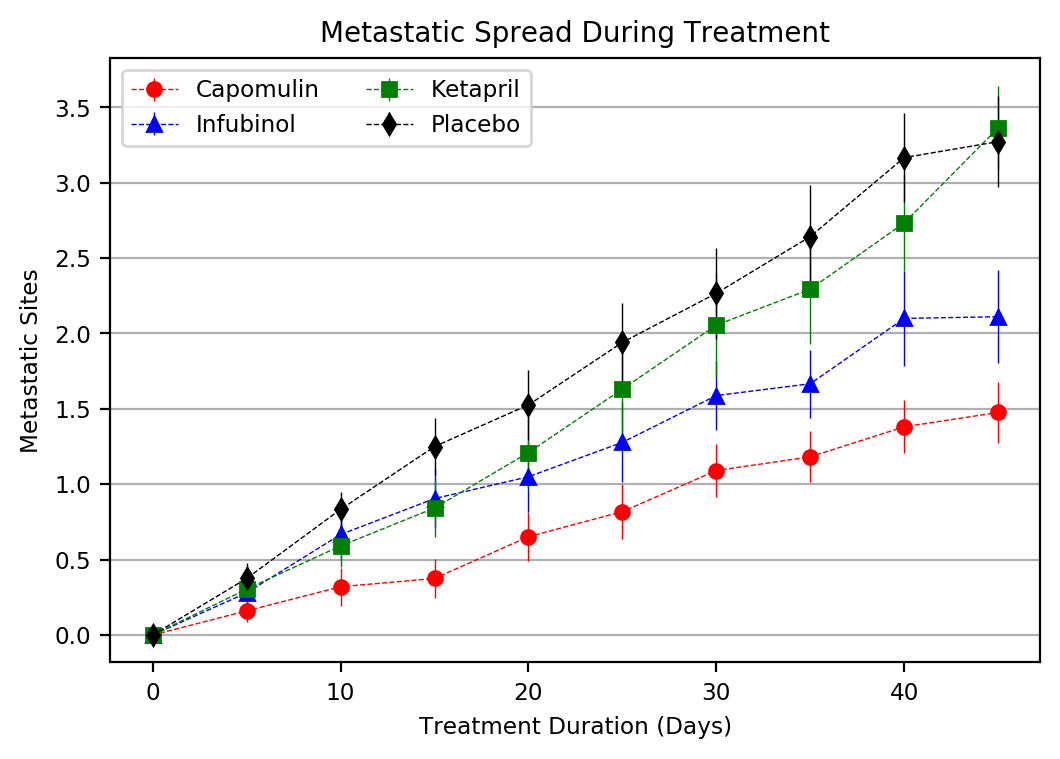

In [14]:
# Generate the Plot (with Error Bars)
plt.rcParams['figure.dpi'] = 200
fig, met_res = plt.subplots()

met_res.errorbar(met_mean.index, met_mean['Capomulin'], met_stderr['Capomulin'], label='Capomulin',
                 fmt='o', ms=5, c='r', ls='--', linewidth=0.5)
#met_res.errorbar(met_mean.index, met_mean['Ceftamin'], met_stderr['Ceftamin'], label='Ceftamin',
#                 fmt='p', ms=5, c='m',  ls='--', linewidth=0.5)
met_res.errorbar(met_mean.index, met_mean['Infubinol'], met_stderr['Infubinol'], label='Infubinol',
                 fmt='^', ms=5, c='b',  ls='--', linewidth=0.5)
met_res.errorbar(met_mean.index, met_mean['Ketapril'], met_stderr['Ketapril'], label='Ketapril',
                 fmt='s', ms=5, c='g',  ls='--', linewidth=0.5)
#met_res.errorbar(met_mean.index, met_mean['Naftisol'], met_stderr['Naftisol'], label='Naftisol',
#                 fmt='x', ms=5, c='y',  ls='--', linewidth=0.5)
met_res.errorbar(met_mean.index, met_mean['Placebo'], met_stderr['Placebo'], label='Placebo',
                 fmt='d', ms=5, c='k',  ls='--', linewidth=0.5)
#met_res.errorbar(met_mean.index, met_mean['Propriva'], met_stderr['Propriva'], label='Propriva',
#                 fmt='*', ms=5, c='c',  ls='--', linewidth=0.5)
#met_res.errorbar(met_mean.index, met_mean['Ramicane'], met_stderr['Ramicane'], label='Ramicane',
#                 fmt='<', ms=5, c='brown',  ls='--', linewidth=0.5)
#met_res.errorbar(met_mean.index, met_mean['Stelasyn'], met_stderr['Stelasyn'], label='Stelasyn',
#                 fmt='>', ms=5, c='pink',  ls='--', linewidth=0.5)
#met_res.errorbar(met_mean.index, met_mean['Zoniferol'], met_stderr['Zoniferol'], label='Zoniferol',
#                 fmt='D', ms=3, c='orange',  ls='--', linewidth=0.5)

plt.title('Metastatic Spread During Treatment', fontsize='medium')
plt.xlabel('Treatment Duration (Days)', fontsize='small')
plt.ylabel('Metastatic Sites', fontsize='small')
plt.xticks(fontsize='small')
plt.yticks(fontsize='small')
plt.legend(loc='best', ncol=2, fontsize='small')
plt.grid(axis='y')

# Save the Figure
plt.savefig('../Images/spread_output.png')

#Show the Figure
plt.show()

## Survival Rates

In [15]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = combined_data.groupby(['Drug','Timepoint'])['Mouse ID'].agg('count')

# Convert to DataFrame
mouse_count = mouse_count.to_frame()
mouse_count = mouse_count.reset_index()
mouse_count = mouse_count.rename(columns={'Mouse ID':'Mouse Count'})

# Preview DataFrame
mouse_count.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [16]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count = mouse_count.pivot(index='Timepoint', columns='Drug', values='Mouse Count')

# Preview the Data Frame
mouse_count.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [17]:
mouse_total = mouse_count.max()
mouse_percent = mouse_count.copy()

for j in range(len(mouse_percent.columns)):
    for i in range(len(mouse_percent)):
        mouse_percent.iloc[i,j] = (mouse_percent.iloc[i,j]/mouse_total[j])*100


mouse_percent.head()
mouse_total

Drug
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     26
Ramicane     25
Stelasyn     26
Zoniferol    25
dtype: int64

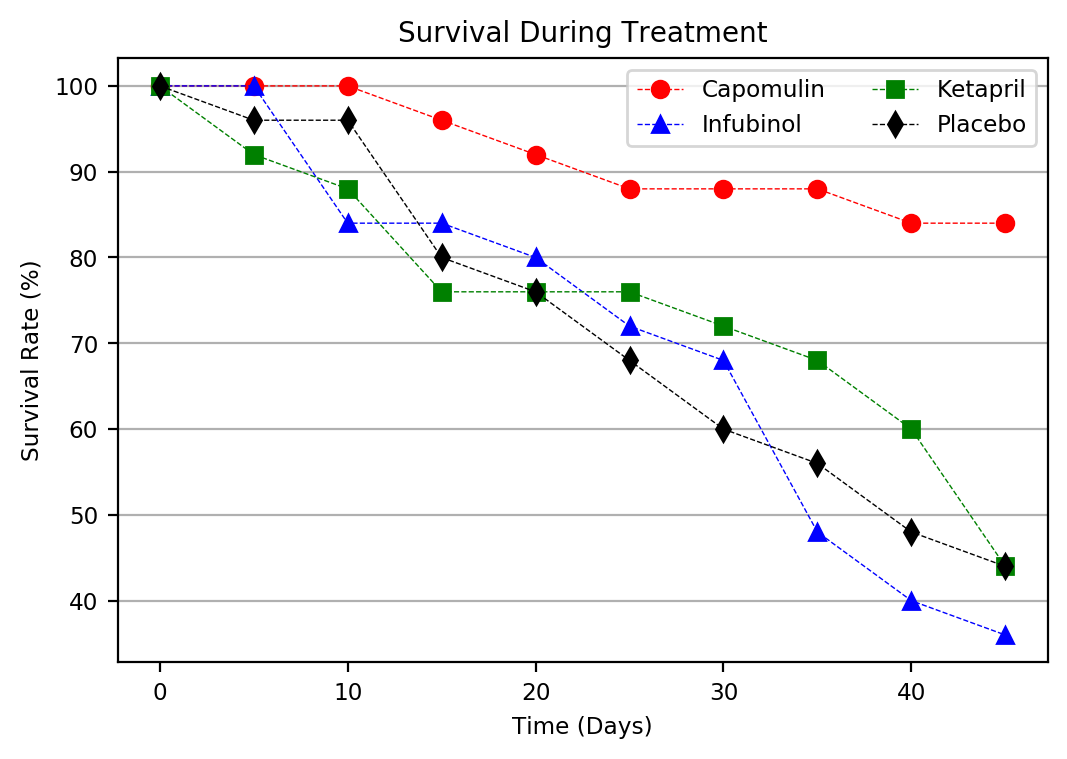

In [18]:
# Generate the Plot (with Error Bars)
plt.rcParams['figure.dpi'] = 200
fig, survival = plt.subplots()

survival.plot(mouse_percent.index, mouse_percent['Capomulin'], label='Capomulin', marker='o', c='r', ls='--', lw=0.5)
#survival.plot(mouse_percent.index, mouse_percent['Ceftamin'], label='Ceftamin', marker='p', c='m', ls='--', lw=0.5)
survival.plot(mouse_percent.index, mouse_percent['Infubinol'], label='Infubinol', marker='^', c='b', ls='--', lw=0.5)
survival.plot(mouse_percent.index, mouse_percent['Ketapril'], label='Ketapril', marker='s', c='g', ls='--', lw=0.5)
#survival.plot(mouse_percent.index, mouse_percent['Naftisol'], label='Naftisol', marker='x',c='y', ls='--', lw=0.5)
survival.plot(mouse_percent.index, mouse_percent['Placebo'], label='Placebo', marker='d', c='k', ls='--', lw=0.5)
#survival.plot(mouse_percent.index, mouse_percent['Propriva'], label='Propriva', marker='*', c='c', ls='--', lw=0.5)
#survival.plot(mouse_percent.index, mouse_percent['Ramicane'], label='Ramicane', marker='<', c='brown', ls='--', lw=0.5)
#survival.plot(mouse_percent.index, mouse_percent['Stelasyn'], label='Stelasyn', marker='>', c='pink', ls='--', lw=0.5)
#survival.plot(mouse_percent.index, mouse_percent['Zoniferol'], label='Zoniferol', marker='D', c='orange', ls='--', lw=0.5)

# Define labels and formatting
plt.title('Survival During Treatment', fontsize='medium')
plt.xlabel('Time (Days)', fontsize='small')
plt.ylabel('Survival Rate (%)', fontsize='small')
plt.legend(loc='best', ncol=2, fontsize='small')
plt.xticks(fontsize='small')
plt.yticks(fontsize='small')
plt.grid(axis='y')

# Save the Figure
plt.savefig('../Images/survival_output.png')

#Show the Figure
plt.show()

## Summary Bar Graph

In [19]:
# Calculate the percent changes for each drug
delta_all = ((tumor_mean.iloc[len(tumor_mean)-1] - tumor_mean.iloc[0]) / tumor_mean.iloc[0])*100

# Convert series to dataframe and update column name
delta_all = delta_all.to_frame()
delta_all.columns = ['% Change']

delta = delta_all.iloc[[0,2,3,5],:]

# Display the data to confirm
delta

,% Change
Drug,
Capomulin,-19.475303
Infubinol,46.123472
Ketapril,57.028795
Placebo,51.297960


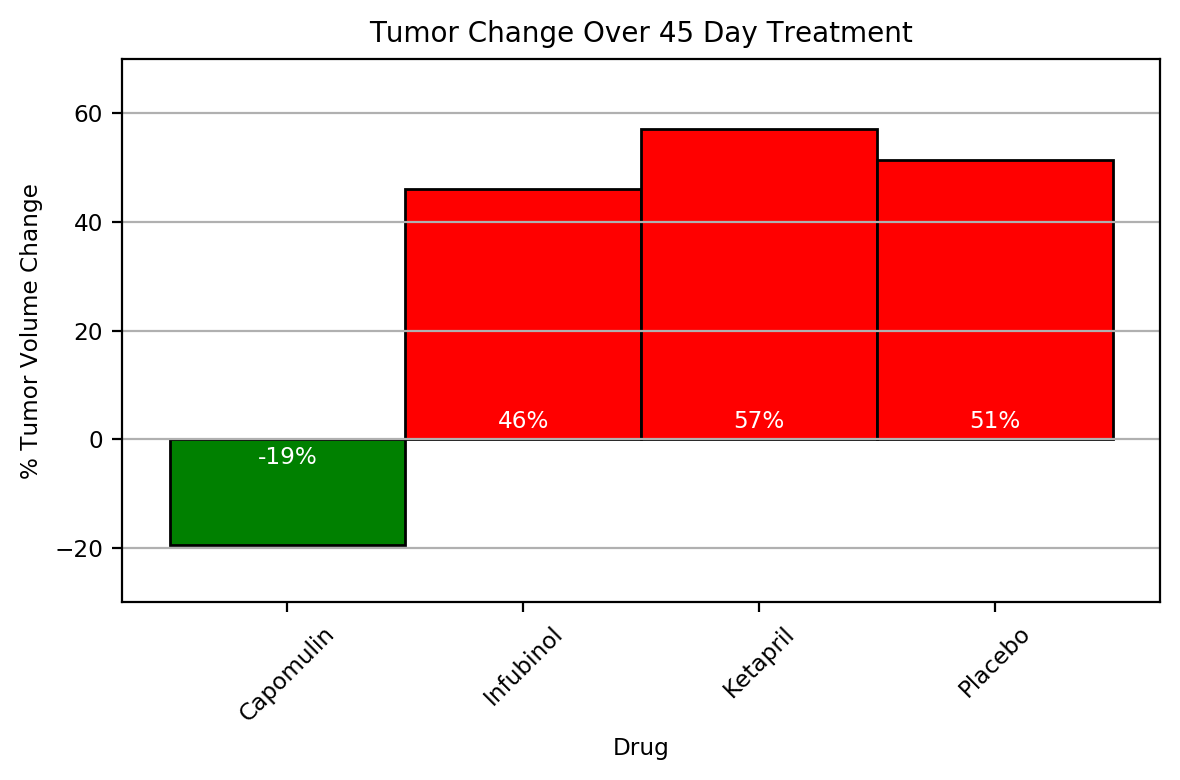

In [20]:
# Store all Relevant Percent Changes into a Tuple

# Splice the data between passing and failing drugs

# Define color of bar based on value (i.e., red for positive values and green for negative values)
colors = list(np.where(delta['% Change']<0,'g','r'))

# Set plot size
#plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['figure.dpi'] = 200

# Plot using .bar function using index values of dataframe as x-ticks, and percent change as bar value
fig, ax = plt.subplots()
percent_bar = plt.bar(delta.index, delta['% Change'], width = -1, color=colors, edgecolor='k', align='center')

# Define labels and formatting
plt.title('Tumor Change Over 45 Day Treatment', fontsize='medium')
plt.xlabel('Drug', fontsize='small')
plt.ylabel('% Tumor Volume Change', fontsize='small')
plt.xticks(fontsize='small', rotation='45')
plt.yticks(fontsize='small')
plt.grid(axis='y')

# Define min and max value limits for y-axis
ylim_min = round(delta['% Change'].min(),-1) - (delta['% Change'].min() % 2 > 0) * 10
ylim_max = round(delta['% Change'].max(),-1) + (delta['% Change'].max() % 2 > 0) * 10
plt.ylim(ylim_min, ylim_max, 20)

# Use for loop and conditional to display values represented by bars
for i, v in enumerate(delta['% Change']):
    if delta['% Change'][i] < 0:
        ax.text(i, 
            -(v/delta['% Change'][i])-3.5, 
            str(int(round(delta['% Change'][i],0))) + '%', 
            fontsize='small', 
            color='white',
            ha='center')
    else:
        ax.text(i, 
            v/delta['% Change'][i]+1, 
            str(int(round(delta['% Change'][i],0))) + '%', 
            color='white',
            fontsize='small',
            ha='center')

# Save the Figure
plt.tight_layout()
plt.savefig('../Images/change_output.png')

# Show figure
plt.show()

_Observations:_
1. Neither Infubinol nor Ketapril are effective treatments.  The test mice experienced similar rates of tumor growth under Infubinol and Ketapril as with the placebo.  Further, the survival rates for Infubinol and Ketapril are similar to that for the placebo.
2. Capomulin appears to be an effective treatment.  Of the four treatments, only Capomulin resulted in a decrease in tumor size/volume.  Further, Capomulin also exhibited a higher survival rate over the treatment period.
3. Capomulin appears to be the most effective treatment for controlling metastatic spread.  Of the four treatments, Capomulin exhibited the fewest metastatic sites on average over the the treatment period